<a href="https://colab.research.google.com/github/benjmcarthur/kaggle-otto/blob/master/base-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader
import pandas as pd
import time as time
import matplotlib.pyplot as plt 

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

import os
import numpy as np



/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
models_dir = '/content/gdrive/My Drive/base_models'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Import the dataset

os.system("ls ../input")

train = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Kaggle/Otto/train.csv')
print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))

labels = train['target']
train.drop(['target', 'id'], axis=1, inplace=True)
#train = train.astype('float64')

print(train.head())

# Split the training set into k folds
# Tried k=20 but that made it no better. But 10 is definitely better than 5 
n_splits=5
kf = StratifiedKFold(n_splits=n_splits)

Training set has 61878 rows and 95 columns
   feat_1  feat_2  feat_3  feat_4  ...  feat_90  feat_91  feat_92  feat_93
0       1       0       0       0  ...        0        0        0        0
1       0       0       0       0  ...        0        0        0        0
2       0       0       0       0  ...        0        0        0        0
3       1       0       0       1  ...        0        0        0        0
4       0       0       0       0  ...        1        0        0        0

[5 rows x 93 columns]


In [0]:
labels =  labels.map({'Class_1': 1, 'Class_2': 2,
                                  'Class_3': 3, 'Class_4': 4,
                                  'Class_5': 5, 'Class_6': 6,
                                  'Class_7': 7, 'Class_8': 8,
                                  'Class_9': 9})
labels = labels.astype('float64')

In [0]:
# Import the test dataset
test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Kaggle/Otto/test.csv")
ids = test['id']
test.drop(['id'], axis=1, inplace=True)
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))

Test set has 144368 rows and 93 columns


In [0]:
train = np.log(train.to_numpy()+1)
test = np.log(test.to_numpy()+1)

In [0]:
# Scale the data 0-1 scaling
scaler = MinMaxScaler()
train = scaler.fit_transform(train.to_numpy())
test = scaler.transform(test.to_numpy())

In [0]:
# Scale the data standard scaling
scaler = StandardScaler()
train = scaler.fit_transform(train.to_numpy())
test = scaler.transform(test.to_numpy())

In [0]:
train = train.to_numpy()
test = test.to_numpy()

In [0]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(93,1000),
            nn.ReLU(),

            nn.Dropout(0.3),
            nn.Linear(1000,800),
            nn.ReLU(),

            nn.Dropout(0.3),
            nn.Linear(800,500),
            nn.ReLU(),

            nn.Dropout(0.25),
            nn.Linear(500,9)
        )

    def forward(self,x):
        x = self.classifier(x)
        return x

In [0]:
model = MLP().to('cuda')
criterion = nn.CrossEntropyLoss().to('cuda')
# Started at weight_decay=0.0000185
optimizer = optim.Adam(model.parameters(),weight_decay=0.00000185)

Running fold  1


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type MLP. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1 Train Loss: 1.411 Validation Loss 1.408 Best so far: 1.408
Epoch: 11 Train Loss: 0.689 Validation Loss 0.697 Best so far: 0.697
Epoch: 21 Train Loss: 0.640 Validation Loss 0.669 Best so far: 0.662
Epoch: 31 Train Loss: 0.609 Validation Loss 0.654 Best so far: 0.643
Epoch: 41 Train Loss: 0.584 Validation Loss 0.631 Best so far: 0.631
Epoch: 51 Train Loss: 0.567 Validation Loss 0.636 Best so far: 0.628
Epoch: 61 Train Loss: 0.556 Validation Loss 0.625 Best so far: 0.611
Epoch: 71 Train Loss: 0.541 Validation Loss 0.618 Best so far: 0.611
Epoch: 81 Train Loss: 0.529 Validation Loss 0.622 Best so far: 0.611
Epoch: 91 Train Loss: 0.519 Validation Loss 0.613 Best so far: 0.608
Epoch: 101 Train Loss: 0.508 Validation Loss 0.611 Best so far: 0.608
Epoch: 111 Train Loss: 0.502 Validation Loss 0.619 Best so far: 0.606
Epoch: 121 Train Loss: 0.492 Validation Loss 0.611 Best so far: 0.606
Epoch: 131 Train Loss: 0.487 Validation Loss 0.610 Best so far: 0.606
Epoch: 141 Train Loss: 0.479 Va

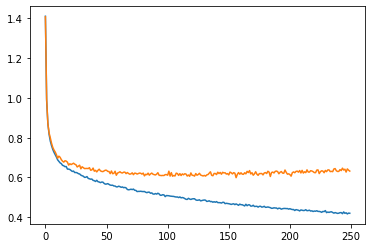

Running fold  2


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type MLP. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1 Train Loss: 1.418 Validation Loss 1.412 Best so far: 1.412
Epoch: 11 Train Loss: 0.691 Validation Loss 0.721 Best so far: 0.721
Epoch: 21 Train Loss: 0.633 Validation Loss 0.681 Best so far: 0.677
Epoch: 31 Train Loss: 0.612 Validation Loss 0.669 Best so far: 0.656
Epoch: 41 Train Loss: 0.586 Validation Loss 0.638 Best so far: 0.638
Epoch: 51 Train Loss: 0.571 Validation Loss 0.645 Best so far: 0.627
Epoch: 61 Train Loss: 0.555 Validation Loss 0.633 Best so far: 0.627
Epoch: 71 Train Loss: 0.537 Validation Loss 0.626 Best so far: 0.626
Epoch: 81 Train Loss: 0.531 Validation Loss 0.623 Best so far: 0.617
Epoch: 91 Train Loss: 0.520 Validation Loss 0.617 Best so far: 0.617
Epoch: 101 Train Loss: 0.506 Validation Loss 0.623 Best so far: 0.617
Epoch: 111 Train Loss: 0.497 Validation Loss 0.624 Best so far: 0.613
Epoch: 121 Train Loss: 0.495 Validation Loss 0.620 Best so far: 0.612
Epoch: 131 Train Loss: 0.489 Validation Loss 0.627 Best so far: 0.612
Epoch: 141 Train Loss: 0.476 Va

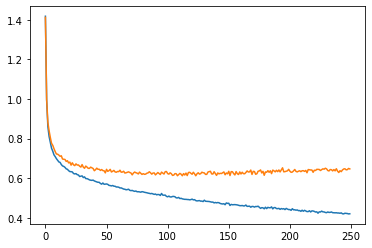

Running fold  3


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type MLP. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1 Train Loss: 1.408 Validation Loss 1.400 Best so far: 1.400
Epoch: 11 Train Loss: 0.693 Validation Loss 0.691 Best so far: 0.691
Epoch: 21 Train Loss: 0.640 Validation Loss 0.653 Best so far: 0.653
Epoch: 31 Train Loss: 0.605 Validation Loss 0.637 Best so far: 0.637
Epoch: 41 Train Loss: 0.588 Validation Loss 0.627 Best so far: 0.624
Epoch: 51 Train Loss: 0.568 Validation Loss 0.615 Best so far: 0.615
Epoch: 61 Train Loss: 0.554 Validation Loss 0.620 Best so far: 0.612
Epoch: 71 Train Loss: 0.544 Validation Loss 0.618 Best so far: 0.609
Epoch: 81 Train Loss: 0.529 Validation Loss 0.601 Best so far: 0.601
Epoch: 91 Train Loss: 0.519 Validation Loss 0.622 Best so far: 0.601
Epoch: 101 Train Loss: 0.510 Validation Loss 0.618 Best so far: 0.601
Epoch: 111 Train Loss: 0.499 Validation Loss 0.604 Best so far: 0.593
Epoch: 121 Train Loss: 0.489 Validation Loss 0.603 Best so far: 0.593
Epoch: 131 Train Loss: 0.484 Validation Loss 0.604 Best so far: 0.593
Epoch: 141 Train Loss: 0.479 Va

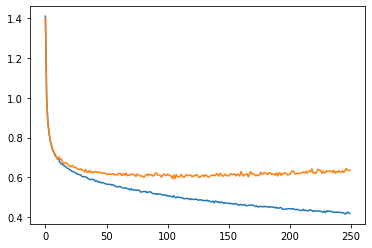

Running fold  4


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type MLP. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1 Train Loss: 1.405 Validation Loss 1.403 Best so far: 1.403
Epoch: 11 Train Loss: 0.697 Validation Loss 0.691 Best so far: 0.691
Epoch: 21 Train Loss: 0.646 Validation Loss 0.646 Best so far: 0.646
Epoch: 31 Train Loss: 0.611 Validation Loss 0.622 Best so far: 0.622
Epoch: 41 Train Loss: 0.593 Validation Loss 0.615 Best so far: 0.615
Epoch: 51 Train Loss: 0.574 Validation Loss 0.602 Best so far: 0.602
Epoch: 61 Train Loss: 0.560 Validation Loss 0.612 Best so far: 0.602
Epoch: 71 Train Loss: 0.545 Validation Loss 0.609 Best so far: 0.592
Epoch: 81 Train Loss: 0.535 Validation Loss 0.594 Best so far: 0.587
Epoch: 91 Train Loss: 0.523 Validation Loss 0.595 Best so far: 0.587
Epoch: 101 Train Loss: 0.516 Validation Loss 0.587 Best so far: 0.583
Epoch: 111 Train Loss: 0.502 Validation Loss 0.598 Best so far: 0.583
Epoch: 121 Train Loss: 0.497 Validation Loss 0.607 Best so far: 0.583
Epoch: 131 Train Loss: 0.489 Validation Loss 0.602 Best so far: 0.583
Epoch: 141 Train Loss: 0.483 Va

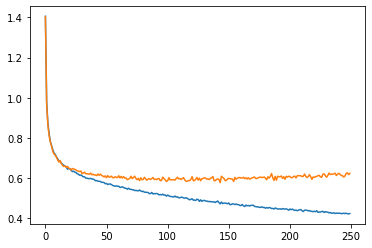

Running fold  5


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type MLP. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch: 1 Train Loss: 1.425 Validation Loss 1.446 Best so far: 1.446
Epoch: 11 Train Loss: 0.695 Validation Loss 0.698 Best so far: 0.698
Epoch: 21 Train Loss: 0.639 Validation Loss 0.665 Best so far: 0.665
Epoch: 31 Train Loss: 0.607 Validation Loss 0.645 Best so far: 0.642
Epoch: 41 Train Loss: 0.584 Validation Loss 0.635 Best so far: 0.635
Epoch: 51 Train Loss: 0.564 Validation Loss 0.631 Best so far: 0.623
Epoch: 61 Train Loss: 0.553 Validation Loss 0.615 Best so far: 0.615
Epoch: 71 Train Loss: 0.543 Validation Loss 0.628 Best so far: 0.615
Epoch: 81 Train Loss: 0.528 Validation Loss 0.619 Best so far: 0.611
Epoch: 91 Train Loss: 0.516 Validation Loss 0.620 Best so far: 0.609
Epoch: 101 Train Loss: 0.509 Validation Loss 0.614 Best so far: 0.609
Epoch: 111 Train Loss: 0.498 Validation Loss 0.616 Best so far: 0.608
Epoch: 121 Train Loss: 0.489 Validation Loss 0.613 Best so far: 0.608
Epoch: 131 Train Loss: 0.479 Validation Loss 0.602 Best so far: 0.602
Epoch: 141 Train Loss: 0.478 Va

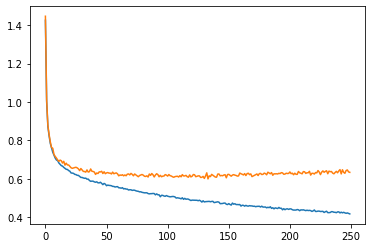

In [0]:
# Deep MLP with K Fold Stacking
train_preds = np.zeros((train.shape[0],9))
test_preds_array = []
best_val_losses = []
k=1

for train_index, valid_index in kf.split(train, labels):

    print('Running fold ', k)
    k += 1

    train_x, valid_x = train[train_index], train[valid_index]
    train_y, valid_y = labels.iloc[train_index], labels.iloc[valid_index]

    train_x = torch.tensor(train_x)
    train_y = torch.tensor(train_y.values)
    valid_x = torch.tensor(valid_x)
    valid_y = torch.tensor(valid_y.values)
    test_x = torch.tensor(test)

    train_x = Variable(train_x).float()
    train_y = Variable(train_y).type(torch.LongTensor)
    valid_x = Variable(valid_x).float()
    valid_y = Variable(valid_y).type(torch.LongTensor)
    test_x = Variable(test_x).float()

    best_model, train_preds_new, test_preds, train_losses, valid_losses, epoch_nums = train_NN(train_x, train_y, valid_x, valid_y, test_x)

    train_preds[valid_index] = train_preds_new
    test_preds_array.append(test_preds)

    ## REMOVE LATER
    #outputs = best_model.forward(train)
    #probs = F.softmax(outputs, dim=1)
    #train_preds = probs.cpu().detach().numpy()
    # </> REMOVE LATER

    plt.figure()
    plt.plot(epoch_nums, train_losses)
    plt.plot(epoch_nums, valid_losses)
    plt.show()

    #train_preds.append(train_preds)

test_preds = np.mean(test_preds_array, axis=0)
#train_preds = np.mean(train_preds_array, axis=0)


#print('Average OOF loss: {}'.format()

# Training
#fname = models_dir + '/train-bigNN-log(x+1)'
#_ = joblib.dump(train_preds, fname, compress=9)

# Test
#fname = models_dir + '/test-bigNN-log(x+1)'
#_ = joblib.dump(test_preds, fname, compress=9)

In [0]:
def train_NN(train_x, train_y, valid_x, valid_y, test_x):

    model = MLP().to('cuda')
    criterion = nn.CrossEntropyLoss().to('cuda')
    optimizer = optim.Adam(model.parameters(),weight_decay=0.00000185)
    model.train()

    train_losses = []
    valid_losses = []
    epoch_nums = []
    epochs = 250
    best_valid_loss = 50
    log_interval = 10
    start_time = time.time()
    model.train()
    batch_size = 10000

    train_x = train_x.to('cuda')
    train_y = train_y.to('cuda')
    valid_x = valid_x.to('cuda')
    valid_y = valid_y.to('cuda')
    test_x = test_x.to('cuda')


    for epoch in range(epochs):

        permutation = torch.randperm(train_x.size()[0])

        for i in range(0,train_x.size()[0], batch_size):
          
            optimizer.zero_grad()

            indices = permutation[i:i+batch_size]
            batch_x, batch_y = train_x[indices], train_y[indices]

            outputs = model.forward(batch_x)
            loss = criterion(outputs, batch_y-1)

            loss.backward()
            optimizer.step()

        valid_l = criterion(model.forward(valid_x), valid_y-1).detach()
        train_l = criterion(model.forward(train_x), train_y-1).detach()

        train_losses.append(train_l)
        valid_losses.append(valid_l)
        epoch_nums.append(epoch)

        if valid_l < best_valid_loss:
          torch.save(model, 'best_model.pth')
          best_valid_loss = valid_l

        if epoch % log_interval == 0:
          print('Epoch: {} Train Loss: {:.3f} Validation Loss {:.3f} Best so far: {:.3f}'.format(epoch+1, train_l, valid_l, best_valid_loss))

    print('Time taken: ', time.time()-start_time)

    # Load best model
    best_model = torch.load('best_model.pth')
    best_model.eval()

    # OOF train set
    outputs = best_model.forward(valid_x)
    probs = F.softmax(outputs, dim=1)
    y_valid_pred = probs.cpu().detach().numpy()

    # Test set
    outputs = best_model.forward(test_x)
    probs = F.softmax(outputs, dim=1)
    y_test_pred = probs.cpu().detach().numpy()

    return best_model, y_valid_pred, y_test_pred, train_losses, valid_losses, epoch_nums

### SUBMIT RESULTS


In [0]:
os.environ['KAGGLE_USERNAME'] = "benmcarthur" # username from the json file
os.environ['KAGGLE_KEY'] = "a89502eb26498960de769db301645abe" # key from the json file

In [0]:
submit = np.c_[ pd.to_numeric(ids, downcast='integer'), test_preds ]
header = 'id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9'
fmt='%i, %1.4f, %1.4f, %1.4f, %1.4f, %1.4f, %1.4f, %1.4f, %1.4f, %1.4f'
np.savetxt('submission.csv', submit, delimiter=',', header=header, comments='',fmt=fmt)
!kaggle competitions submit -c otto-group-product-classification-challenge -f submission.csv -m "std scaling"

100% 10.8M/10.8M [00:02<00:00, 4.76MB/s]
Successfully submitted to Otto Group Product Classification Challenge